In [48]:
!pip install praw

In [49]:
import pandas as pd
file = "C:\\Users\\keert\\Downloads\\collection.csv"
df = pd.read_csv(file)

df.head(20)

,COMMENT_ID,AUTHOR,DATE,text,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1
5,z133yfmjdur4dvyjr04ceh2osl2fvngrqi4,Darrion Johnson,2015-05-29T01:27:30.360000,Wow this video almost has a billion views! Did...,0
6,z12zgrw5furdsn0sc233hfwavnznyhicq,kyeman13,NaN,Go check out my rapping video called Four Whee...,1
7,z12vxdzzds2kzzrzq04cdjc4ozq2szuyl5o,Damax,2015-05-29T00:41:22.426000,Almost 1 billion﻿,0
8,z12gxdortqzwhhqas04cfjrwituzghb5tvk0k,Muhammad Asim Mansha,NaN,Aslamu Lykum... From Pakistan﻿,1
9,z132wd4ywmicxj2gn04cdfhilyryjhmjhk00k,JuanPa Rap,2015-05-28T23:23:41.231000,Eminem is idol for very people in España and M...,0


In [50]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)




{'out', 'her', 'if', 'during', 'he', 'on', 'each', 'y', 'further', 'yourselves', 'can', 'which', 'only', 'for', 'how', 'few', 'when', 'is', 'here', 'himself', 'as', 'above', "mightn't", 'some', 'more', 'being', 'needn', 'after', 'has', 'whom', "isn't", 'with', "you're", 'your', 'those', "weren't", 'was', 'then', 'nor', 'have', 'having', 'this', 'a', 'aren', "aren't", 'very', 'she', 'before', 'by', 'wasn', "wouldn't", 'does', 'to', 'they', 'yours', 'are', 'do', 'these', "you've", 'doesn', "needn't", 'the', 'them', 'were', 'an', 'you', 'or', 'most', 'below', 'same', 'couldn', 'him', 'ma', "wasn't", "shan't", 'am', 'be', 'but', "you'll", 'hadn', 'in', 'did', 'hasn', 'myself', 'me', 'under', "that'll", "hasn't", 'm', 'of', 'mustn', 'won', "haven't", 'shan', 'no', 'our', 'any', 'than', 'we', 'herself', "don't", 'my', 'don', "you'd", 'hers', 's', 'over', 'own', 'just', 'now', 'all', 'his', 'such', 'from', 'it', 'other', 'through', "doesn't", 'at', "it's", 'that', 'into', 'wouldn', 'and', 'll

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w,:.-]*[a-zA-Z][\w,:.-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
  tokens = text
  for fun in pipeline:
    tokens = fun(tokens)
  return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [65]:

import pandas as pd
from collections import Counter

counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
tokens,
check,207
like,80
video,75
please,73
song,67
love,64
subscribe,56
eminem,55
quot,53


In [53]:

df['length'] = df['text'].str.len()

<Axes: ylabel='Frequency'>

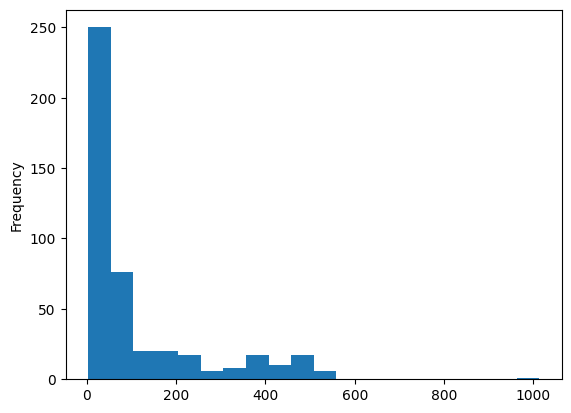

In [54]:
df['length'].plot(kind='hist', bins=20)


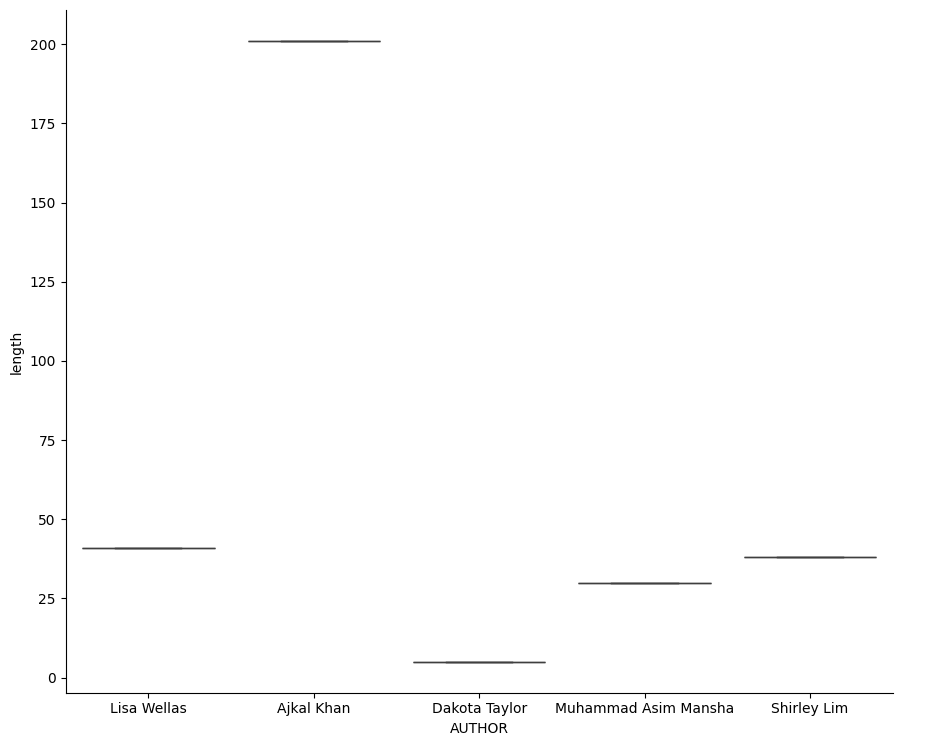

In [55]:

import seaborn as sns
where = df['AUTHOR'].isin(['Lisa Wellas', 'Ajkal Khan','Dakota Taylor', 'Muhammad Asim Mansha','Shirley Lim'])
g = sns.catplot(data=df[where], x="AUTHOR", y="length", kind='box')
g.fig.set_size_inches(10, 8) 

<Axes: >

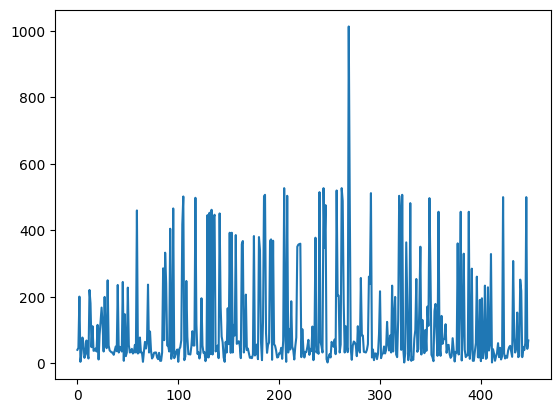

In [56]:
df['length'].plot()

In [59]:
import pandas as pd
from scipy import stats

# Assuming the cleaned data is stored in a DataFrame called 'df'
# and the column of interest is 'numeric_column'

# Mean
mean_value = df['CLASS'].mean()
print("Mean:", mean_value)

# Median
median_value = df['CLASS'].median()
print("Median:", median_value)

# Mode
mode_value = stats.mode(df['CLASS'])
print("Mode:", mode_value)

# Standard Deviation
std_dev = df['CLASS'].std()
print("Standard Deviation:", std_dev)


Mean: 0.546875
Median: 1.0
Mode: ModeResult(mode=1, count=245)
Standard Deviation: 0.49835439489210626


In [58]:
pip install scipy

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.6 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/45.9 MB 5.8 MB/s eta 0:00:08
    --------------------------------------- 0.8/45.9 MB 10.8 MB/s eta 0:00:05
   - -------------------------------------- 1.8/45.9 MB 15.8 MB/s eta 0:00:03
   --- ------------------------------------ 3.6/45.9 MB 20.8 MB/s eta 0:00:03
   ---- ----------------------------------- 4.8/45.9 MB 21.9 MB/s eta 0:00:02
   ----- ---------------------------------- 6.2/45.9 MB 23.3 MB/s eta 0:00:02
   ------- -------------------------------- 8.3/45.9 MB 25.2 MB/s eta 0:00:02
   -------- ------------------------------- 9.2/45.9 MB 26.8 MB/s eta 0:00:02
   --------- ------------------------------ 11.0/45.9 MB 32.7 MB/s eta 0:00

In [70]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
        return tokens

In [71]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

In [73]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,COMMENT_ID,AUTHOR,DATE,text,CLASS,tokens,length,num_tokens
443,LneaDw26bFu3RCmyrWyP9S6wh1h9dBv3X95g1HzKAb4,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1,subscribe to my channel x please!. spare,40,40
444,LneaDw26bFsD65dtIvAEObWYIYnFTqQDKBek_Ypz3J8,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1,check out my videos guy! :) hope you guys had ...,61,61
445,LneaDw26bFuvs-8oWkLpAFa6g3QHpWD8k7sbbMP3Bg8,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1,3 yrs ago i had a health scare but thankfully ...,500,500
446,z12hfp2wmyuqztkw504cgblyxtbsxjuzeow0k,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0,rihanna looks so beautiful with red hair ;)﻿,44,44
447,z13tsbc5vvn0hdozz04chjt51lq1cvris0k,Gaming Gaming,2015-05-06T10:56:35.972000,857.482.940 views AWESOME !!!!!!!!!!!!!!!!!!!!...,0,857.482.940 views awesome !!!!!!!!!!!!!!!!!!!!...,69,69


In [74]:
from collections import Counter
tokens = tokenize("Midterm.")
testcount= Counter(tokens)
print(testcount)

Counter({'Midterm.': 1})


In [75]:
more_tokens = tokenize("Text based analysis.")
testcount.update(more_tokens)
print(testcount)

Counter({'Midterm.': 1, 'Text': 1, 'based': 1, 'analysis.': 1})


In [76]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[(' ', 8776), ('e', 4248), ('o', 3297), ('t', 2870), ('a', 2686)]


In [78]:
freq_df = pd.DataFrame.from_dict(counter,
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'

In [79]:
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
,8776
e,4248
o,3297
t,2870
a,2686
i,2588
s,2326
n,2263
r,1765


In [80]:
freq_df.describe()

,freq
count,108.000000
mean,465.842593
std,1134.017646
min,1.000000
25%,4.000000
50%,34.500000
75%,209.500000
max,8776.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

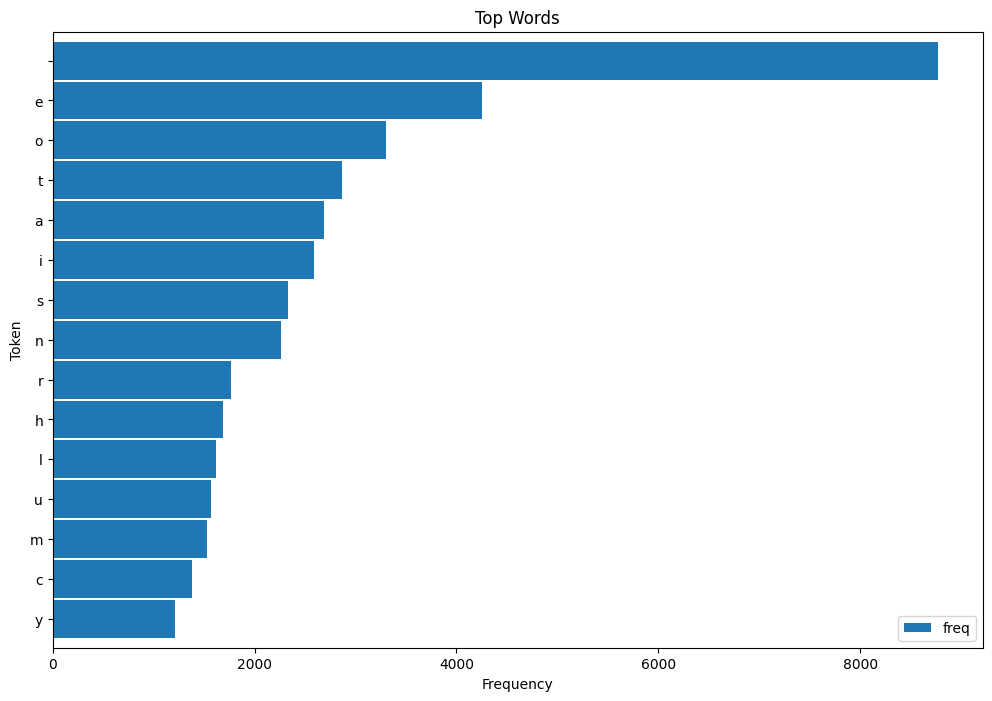

In [81]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

(-0.5, 399.5, 199.5, -0.5)

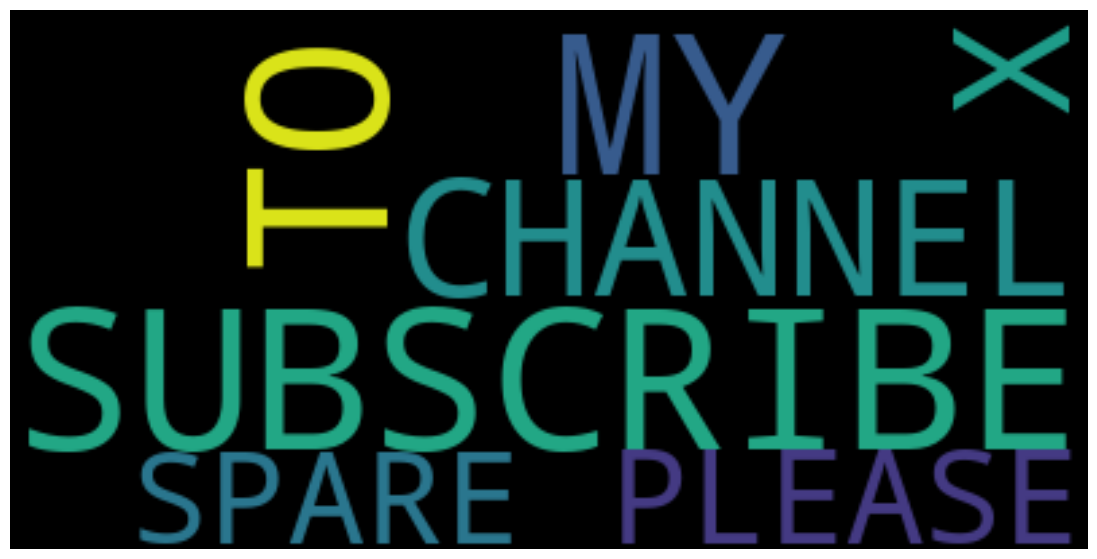

In [95]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
text = df.query("length==40 and AUTHOR=='Dany PK'")['text'].values[0]
plt.figure(figsize=(14, 7)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [102]:
#4
import re

# Sample strings containing the patterns
username_example = "Usernames can contain letters, numbers, and underscores (e.g., john_doe123)."
password_example = "Passwords must be at least 8 characters long and contain at least one uppercase letter, one lowercase letter, one digit, and one special character (!@#$%^&*)."

# Regex patterns
username_pattern = r'\b[a-zA-Z0-9_]{4,}\b'
password_pattern = r'^(?=.*[a-z])(?=.*[A-Z])(?=.*\d)(?=.*[!@#$%^&*])[A-Za-z\d!@#$%^&*]{8,}$'

# Extracting and printing matches
print("Username:", re.findall(username_pattern, username_example))
print("Password:", re.findall(password_pattern, password_example))




Username: ['Usernames', 'contain', 'letters', 'numbers', 'underscores', 'john_doe123']
Password: []


In [104]:
!pip install praw


In [105]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="OzmI-gBmHEgq5EdmdjtqcA",
    client_secret="mdR2khrB4kOJJQhXqPLDW69z5iYPMQ",
    user_agent=user_agent
)

In [106]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression